# Conversão de Imagem para Arte ASCII
Este notebook apresenta o processo de conversão de uma imagem para arte ASCII.

## Etapas do Processo:
1. **Carregamento e pré-processamento da imagem**
2. **Conversão para escala de cinza** 
3. **Redimensionamento da imagem**
4. **Mapeamento de intensidade para caracteres ASCII**
5. **Geração da arte ASCII**
6. **Comparação visual e salvamento**
7. **Experimentação com diferentes densidades de caracteres**


In [80]:
import matplotlib.pyplot as plt
import numpy as np 
import cv2
from PIL import Image, ImageFont, ImageDraw

In [81]:
# Definir conjunto de caracteres ASCII por densidade
ASCII_CHARS_DETAILED = "@%#*+=-:. "
ASCII_CHARS_SIMPLE = "@#*+=-:. "
ASCII_CHARS_MINIMAL = "@*:. "

In [82]:
def load_and_preprocess_image(iamge_path, width=80):
    """
    Carrega e pré-processa a imagem para conversão ASCII
    """
    # Carregar imagem
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Imagem não encontrada: {iamge_path}")
    
    # Converter BGR para RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Converter para escala de cinza
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    
    # Calcular nova altura mantendo a proporção
    height, original_width = img_gray.shape
    aspect_ratio = height / original_width
    new_height = int (width * aspect_ratio * 0.55) # 0.55 para compensar proporção dos caracteres
    
    # Redimensionar imagem
    img_resized = cv2.resize(img_gray, (width, new_height))
    
    return img_rgb, img_gray, img_resized


In [83]:
def pixels_to_ascii(image, ascii_chars):
    """
    Coverte pixels em caracteres ASCII baseado na intensidade
    """
    # Normalizar valroes de pixel para índices dos caracteres ASCII
    pixels = np.array(image)
    pixels_normalized = pixels / 255.0
    indices = (pixels_normalized * (len(ascii_chars) - 1)).astype(int)
    
    # Mapear para caracteres ASCII
    ascii_str = ""
    for row in indices:
        for pixel in row:
            ascii_str += ascii_chars[pixel]
        ascii_str += "\n"
        
    return ascii_str

In [84]:
def save_ascii_art(ascii_str, filename):
    """
    Salva a arte ASCII em um arquivo de texto
    """
    with open(filename, 'w') as f:
        f.write(ascii_str)
    print(f"Arte ASCII salva em: {filename}")


In [ ]:
#Carregar imagem
image_path = '/home/netorapg/projects/ML/ascii/_ trumpet! - - - #pixelart #pixel #pixelartist #bitart #asperite #pixelartwork #digitalartwork #pixel_dailies.jpeg'  # Usar a mesma imagem
img_original, img_gray, img_resized = load_and_preprocess_image(image_path, width=60)

print(f"Imagem original: {img_original.shape}")
print(f"Imagem em escala de cinza: {img_gray.shape}")
print(f"Imagem redimensionada: {img_resized.shape}")


Imagem original: (537, 736, 3)
Imagem em escala de cinza: (537, 736)
Imagem redimensionada: (24, 60)


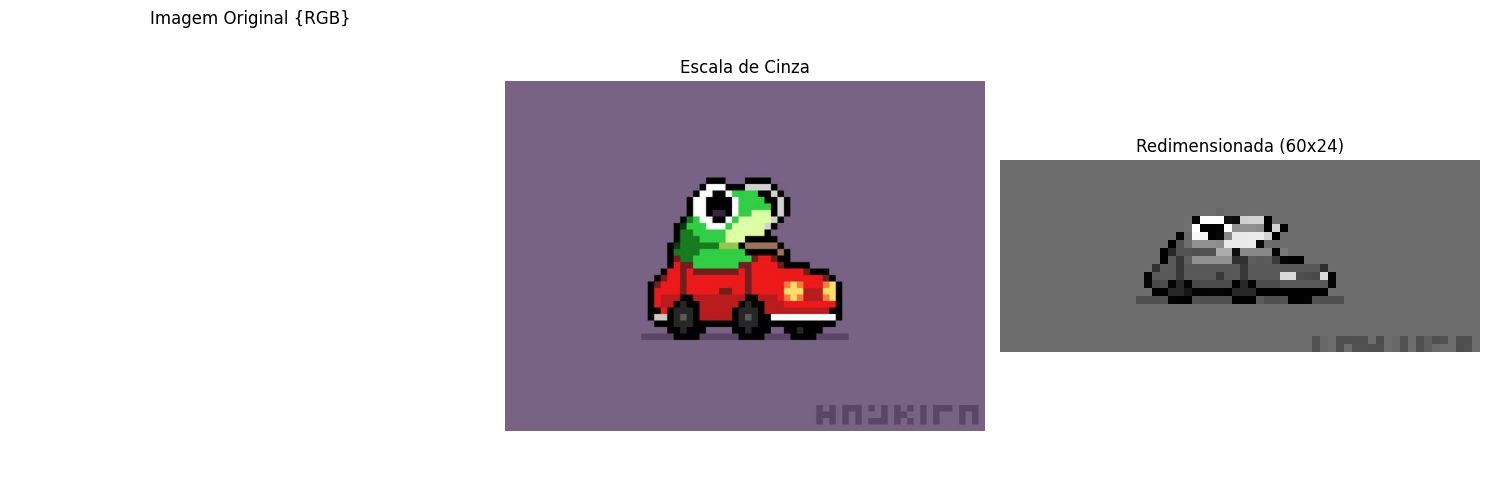

In [86]:
# Visualizar etapas do pré-processamento
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Imagem Original {RGB}')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_original)
plt.title('Escala de Cinza')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_resized, cmap='gray')
plt.title(f'Redimensionada ({img_resized.shape[1]}x{img_resized.shape[0]})')
plt.axis('off')

plt.tight_layout()
plt.show()

In [87]:
# Gerar arte ASCII com diferentes densidades de caracteres
print("=== ARTE ASCII - DENSIDADE DETALHADA ===")
ascii_detailed = pixels_to_ascii(img_resized, ASCII_CHARS_DETAILED)
print(ascii_detailed[:500] + "...") # Mostrar apenas primeiros 500 caracteres

print("=== ARTE ASCII - DENSIDADE SIMPLES ===")
ascii_simple = pixels_to_ascii(img_resized, ASCII_CHARS_SIMPLE)
print(ascii_simple[:500] + "...")

print("=== ARTE ASCII - DENSIDADE MINIMAL ===")
ascii_minimal = pixels_to_ascii(img_resized, ASCII_CHARS_MINIMAL)
print(ascii_minimal[:500] + "...")


=== ARTE ASCII - DENSIDADE DETALHADA ===
************************************************************
************************************************************
************************************************************
************************************************************
************************************************************
************************************************************
************************************************************
************************@...@@:::@**************************
************...
=== ARTE ASCII - DENSIDADE SIMPLES ===
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++

In [88]:
# Comparação de diferentes larguras
def compare_widths():
    """
    Compara arte ASCII com diferentes larguras
    """
    widths = [30, 50, 80, 100]
    
    print("=== COMPARAÇÃO DE LARGURAS ===")
    for width in widths:
        _, _, img_resized = load_and_preprocess_image(image_path, width=width)
        ascii_art = pixels_to_ascii(img_resized, ASCII_CHARS_SIMPLE)
        
        print(f"\n--- LARGURA: {width} caracteres ---")
        print(ascii_art[:3000] + "...")
        
compare_widths()

=== COMPARAÇÃO DE LARGURAS ===

--- LARGURA: 30 caracteres ---
++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++
+++++++++++++@+@@+++++++++++++
+++++++++++@.#...@++++++++++++
+++++++++++*==.@@+++++++++++++
++++++++++**###****@++++++++++
+++++++++**@***@*==*:+++++++++
++++++++++@@@+@@@@#@++++++++++
++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++
+++++++++++++++++++**+++*+++**
...

--- LARGURA: 50 caracteres ---
++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++..@.==@@@+++++++++++++++++++++
+++++++++++++++++++@ @#@==..:@++++++++++++++++++++
++++++++++++++++++#==..=...-++++++++++++++++++++++
+++++++++++++++++@****--@+++@+++++++++++++++++++++
+++++++++++++++++@#

In [89]:
# Salvar arquivos ASCII
save_ascii_art(ascii_detailed, 'ascii_detailed.txt')
save_ascii_art(ascii_simple, 'ascii_simple.txt')
save_ascii_art(ascii_minimal, 'ascii_minimal.txt')

Arte ASCII salva em: ascii_detailed.txt
Arte ASCII salva em: ascii_simple.txt
Arte ASCII salva em: ascii_minimal.txt


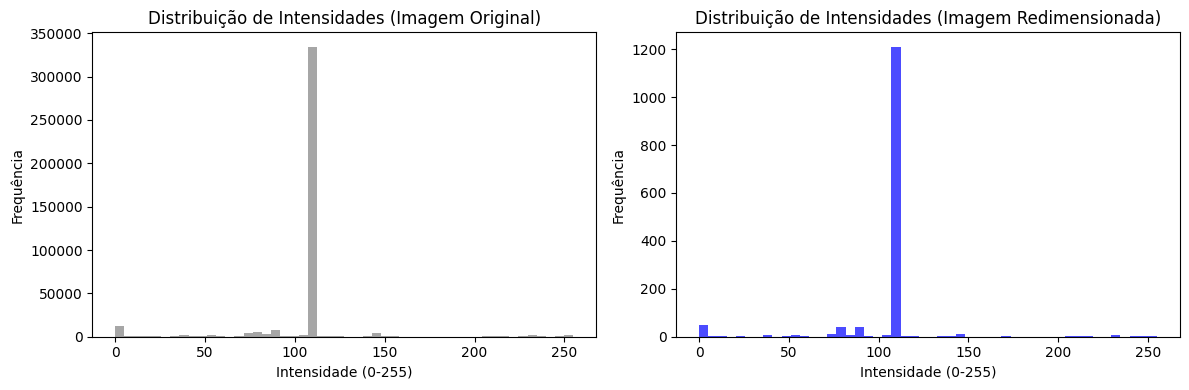

In [90]:
# Análise da distribuição de intensidades
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(img_gray.flatten(), bins=50, color='gray', alpha=0.7)
plt.title('Distribuição de Intensidades (Imagem Original)')
plt.xlabel('Intensidade (0-255)')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(img_resized.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribuição de Intensidades (Imagem Redimensionada)')
plt.xlabel('Intensidade (0-255)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


In [91]:
# Função avançada: ASCII colorido (opcional)
def create_colored_ascii(image_path, width=60):
    """
    Cria ASCII art colorido usando códigos ANSI
    """
    img_original, _, img_resized = load_and_preprocess_image(image_path, width)
    
    # Redimensionar imagem colorida também
    height, original_width = img_original.shape[:2]
    aspect_ratio = height / original_width
    new_height = int(width * aspect_ratio * 0.55)
    img_color_resized = cv2.resize(img_original, (width, new_height))
    
    ascii_colored = ""
    for i in range(img_resized.shape[0]):
        for j in range(img_resized.shape[1]):
            # Intensidade para ASCII
            intensity = img_resized[i, j]
            char_index = int(intensity / 255.0 * (len(ASCII_CHARS_SIMPLE) - 1))
            char = ASCII_CHARS_SIMPLE[char_index]
            
            # Cor do pixel original
            r, g, b = img_color_resized[i, j]
            
            # Código ANSI para cor
            ascii_colored += f"\033[38;2;{r};{g};{b}m{char}\033[0m"
        
        ascii_colored += "\n"
    
    return ascii_colored

In [92]:
# Função avançada: ASCII colorido (opcional)
def create_colored_ascii(image_path, width=60):
    """
    Cria ASCII art colorido usando códigos ANSI
    """
    img_original, _, img_resized = load_and_preprocess_image(image_path, width)
    
    # Redimensionar imagem colorida também
    height, original_width = img_original.shape[:2]
    aspect_ratio = height / original_width
    new_height = int(width * aspect_ratio * 0.55)
    img_color_resized = cv2.resize(img_original, (width, new_height))
    
    ascii_colored = ""
    for i in range(img_resized.shape[0]):
        for j in range(img_resized.shape[1]):
            # Intensidade para ASCII
            intensity = img_resized[i, j]
            char_index = int(intensity / 255.0 * (len(ASCII_CHARS_SIMPLE) - 1))
            char = ASCII_CHARS_SIMPLE[char_index]
            
            # Cor do pixel original
            r, g, b = img_color_resized[i, j]
            
            # Código ANSI para cor
            ascii_colored += f"\033[38;2;{r};{g};{b}m{char}\033[0m"
        
        ascii_colored += "\n"
    
    return ascii_colored